In [1]:
import pandas as pd 
import numpy as np

df=pd.read_csv("Admission_Predict.csv")

In [2]:
df.head(2)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76


In [4]:
df.drop(columns=['Serial No.'],inplace=True)

In [5]:
df.tail(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
398,312,103,3,3.5,4.0,8.78,0,0.67
399,333,117,4,5.0,4.0,9.66,1,0.95


In [7]:
X=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [8]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [9]:
y


0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [11]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
93,301,97,2,3.0,3.0,7.88,1
23,334,119,5,5.0,4.5,9.70,1
299,305,112,3,3.0,3.5,8.65,0
13,307,109,3,4.0,3.0,8.00,1
90,318,106,2,4.0,4.0,7.92,1
...,...,...,...,...,...,...,...
255,307,110,4,4.0,4.5,8.37,0
72,321,111,5,5.0,5.0,9.45,1
396,325,107,3,3.0,3.5,9.11,1
235,326,111,5,4.5,4.0,9.23,1


In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [13]:
import tensorflow

In [14]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense


In [35]:


model = Sequential()
model.add(Input(shape=(7,)))  # Only one Input layer needed
model.add(Dense(7, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='linear'))


In [36]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [39]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.7657 - val_loss: 0.7531
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6469 - val_loss: 0.6260
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5232 - val_loss: 0.5038
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4232 - val_loss: 0.3848
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3298 - val_loss: 0.2711
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2324 - val_loss: 0.1746
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1598 - val_loss: 0.1018
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0886 - val_loss: 0.0555
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0490 - val_loss: 0.0309
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0311 - val_loss: 0.0213
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0214 - val_loss: 0.0192
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0200 - val_loss: 0.0193

In [40]:
y_predicted=model.predict(X_test_scaled)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [41]:
y_predicted

array([[0.74834037],
       [0.57036823],
       [0.7689122 ],
       [0.83922905],
       [0.8958477 ],
       [0.608988  ],
       [0.5828999 ],
       [0.46507987],
       [0.54186696],
       [1.0084075 ],
       [0.79530084],
       [0.90672064],
       [0.8404131 ],
       [0.6465665 ],
       [0.8132771 ],
       [0.63334835],
       [0.74163675],
       [0.7846177 ],
       [0.51744103],
       [0.67471653],
       [0.57482904],
       [0.70802665],
       [0.8273659 ],
       [0.9498377 ],
       [0.6740045 ],
       [0.5206006 ],
       [0.8290057 ],
       [0.63372713],
       [0.8623311 ],
       [0.69548315],
       [1.0134895 ],
       [0.673829  ],
       [0.83031154],
       [0.71705866],
       [0.7758814 ],
       [0.63236934],
       [0.49036193],
       [0.68555874],
       [0.9020817 ],
       [0.746673  ],
       [0.93998575],
       [0.6100617 ],
       [0.9349612 ],
       [0.5494514 ],
       [1.0023725 ],
       [0.76887697],
       [0.776076  ],
       [0.825

In [42]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predicted)

0.6965302351478614

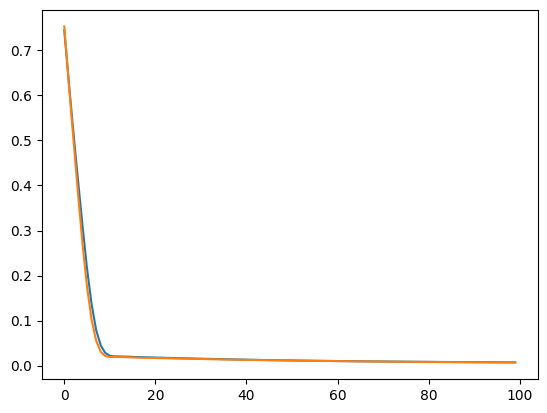

In [44]:
import matplotlib.pyplot as plt 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [45]:
#No overfitting 

#fIRSTLY the loss was decreased steadily at a massive amount 

#Then it was steadily decreased at some point 